# Global Open Data Index

В данном датасете исследуется принадлежность открытых данных к одной из четырнадцати категорий, такие как результаты выборов, бюджет правильства, загрязнение воздуха, государственные расходы, замлевладение и т.д.

## Описание данных:

* Country Name и Country Code: название и код страны, в которой представлены открые данные
* Year: год представления открых данных
* Category: категория октрытых данных
* Rank и Score: текущее место и количество наборов(очков) страны по открытым данным в заданной категории
* Open Data: открытые данные
* Existent: существование
* Current: действительность
* Public: публичность
* Free: свободные
* Digital: цифровые
* Online: в интернете
* Machine Readable: машиночитаемые
* Downloadable: доступные для загрузки
* Open License: с открытой лицензией

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('D:/ml/scores.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Country Code,Country Name,Year,Category,Rank,Score,Open Data,Existent,Current,Public,Free,Digital,Online,Machine Readable,Downloadable,Open License
0,AL,Albania,2015,Air Pollution,54,35,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No
1,AL,Albania,2015,Company Registrations,33,35,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No
2,AL,Albania,2015,Election Results,45,45,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
3,AL,Albania,2015,Government Budget,45,60,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No
4,AL,Albania,2015,Government Expenditures,4,60,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No
5,AL,Albania,2015,Government Procurement,36,45,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
6,AL,Albania,2015,Land Ownership,34,25,No,Yes,Yes,No,No,Yes,Yes,Unknown,Unknown,No
7,AL,Albania,2015,Legislation,92,35,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No
8,AL,Albania,2015,National Map,21,60,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No
9,AL,Albania,2015,National Boundaries,14,70,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [5]:
print(data)

     Country Code         Country Name  Year                  Category  Rank  \
0              AL              Albania  2015             Air Pollution    54   
1              AL              Albania  2015     Company Registrations    33   
2              AL              Albania  2015          Election Results    45   
3              AL              Albania  2015         Government Budget    45   
4              AL              Albania  2015   Government Expenditures     4   
5              AL              Albania  2015    Government Procurement    36   
6              AL              Albania  2015            Land Ownership    34   
7              AL              Albania  2015               Legislation    92   
8              AL              Albania  2015              National Map    21   
9              AL              Albania  2015       National Boundaries    14   
10             AL              Albania  2015       National Statistics    48   
11             AL              Albania  

Так как код каждой страны уникальный, то имеет смысл убрать столбец Country Name:

In [7]:
data = data.drop('Country Name', axis=1)

In [8]:
print(data.shape)
print(data.columns)

(3153, 15)
Index(['Country Code', 'Year', 'Category', 'Rank', 'Score', 'Open Data',
       'Existent', 'Current', 'Public', 'Free', 'Digital', 'Online',
       'Machine Readable', 'Downloadable', 'Open License'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=3153, step=1)

In [10]:
data.at[2, 'Rank']

45

In [11]:
data['Category']

0                  Air Pollution
1          Company Registrations
2               Election Results
3              Government Budget
4        Government Expenditures
5         Government Procurement
6                 Land Ownership
7                    Legislation
8                   National Map
9            National Boundaries
10           National Statistics
11                 Water Quality
12             Weather Forecasts
13                 Air Pollution
14         Company Registrations
15              Election Results
16             Government Budget
17       Government Expenditures
18        Government Procurement
19                Land Ownership
20                   Legislation
21                  National Map
22           National Boundaries
23           National Statistics
24                 Water Quality
25             Weather Forecasts
26                 Air Pollution
27         Company Registrations
28              Election Results
29             Government Budget
          

In [12]:
data['Category'][3]

'Government Budget'

In [13]:
data['Score'].dtype.name

'int64'

In [14]:
type(data['Category'][3])

str

In [15]:
type(data['Category'])

pandas.core.series.Series

In [16]:
data.head()

,Country Code,Year,Category,Rank,Score,Open Data,Existent,Current,Public,Free,Digital,Online,Machine Readable,Downloadable,Open License
0,AL,2015,Air Pollution,54,35,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No
1,AL,2015,Company Registrations,33,35,No,Yes,No,Yes,Yes,Yes,Yes,No,No,No
2,AL,2015,Election Results,45,45,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
3,AL,2015,Government Budget,45,60,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No
4,AL,2015,Government Expenditures,4,60,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No


In [17]:
data.tail()

,Country Code,Year,Category,Rank,Score,Open Data,Existent,Current,Public,Free,Digital,Online,Machine Readable,Downloadable,Open License
3148,US,2013,Legislation,1,100,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3149,US,2013,National Map,1,100,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3150,US,2013,National Boundaries,1,100,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3151,US,2013,National Statistics,1,100,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3152,US,2013,Transportation Schedules,6,75,No,Yes,Yes,Yes,Yes,Yes,Yes,Unknown,Unknown,Yes


In [18]:
data.describe()

,Year,Rank,Score
count,3153.000000,3153.000000,3153.000000
mean,2014.300666,41.869648,39.031082
std,0.784318,28.851303,31.527650
min,2013.000000,1.000000,0.000000
25%,2014.000000,18.000000,10.000000
50%,2015.000000,37.000000,45.000000
75%,2015.000000,62.000000,60.000000
max,2015.000000,118.000000,100.000000


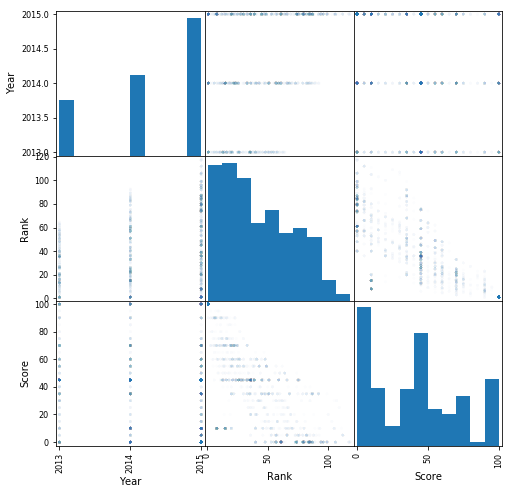

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (8, 8))
pass

In [20]:
data.corr()

,Year,Rank,Score
Year,1.000000,0.295317,-0.178614
Rank,0.295317,1.000000,-0.750156
Score,-0.178614,-0.750156,1.000000


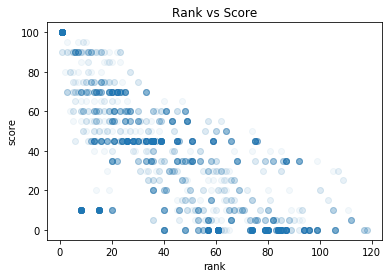

In [21]:
plt.plot(data['Rank'], data['Score'], 'o', alpha = 0.05)
plt.xlabel('rank')
plt.ylabel('score')
plt.title('Rank vs Score')
pass

In [22]:
data['Category'] == 'Air Pollution'

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13       True
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
3123    False
3124     True
3125    False
3126    False
3127    False
3128    False
3129    False
3130    False
3131    False
3132    False
3133     True
3134    False
3135    False
3136    False
3137    False
3138    False
3139    False
3140    False
3141    False
3142    False
3143     True
3144    False
3145    False
3146    False
3147    False
3148    False
3149    False
3150    False
3151    False
3152    False
Name: Category, Length: 3153, dtype: bool

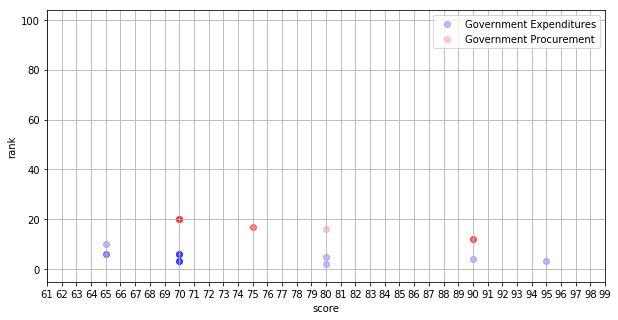

In [23]:
plt.figure(figsize = (10, 5))

plt.scatter(data[data['Category'] == 'Government Expenditures']['Score'],
            data[data['Category'] == 'Government Expenditures']['Rank'],
            alpha = 0.25,
            label = 'Government Expenditures',
            color = 'b')

plt.scatter(data[data['Category'] == 'Government Procurement']['Score'],
            data[data['Category'] == 'Government Procurement']['Rank'],
            alpha = 0.2,
            label = 'Government Procurement',
            color = 'r')

plt.xlabel('score')
plt.xticks(range(0, 100))
plt.xlim(61, 99)
plt.ylabel('rank')
plt.legend()
plt.grid()

In [24]:
data.describe(include = ['object'])

,Country Code,Category,Open Data,Existent,Current,Public,Free,Digital,Online,Machine Readable,Downloadable,Open License
count,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153
unique,140,14,2,3,3,3,3,3,3,3,3,3
top,KE,National Statistics,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
freq,33,279,2776,2529,1597,1948,1820,2338,1903,1798,1882,2138


In [25]:
data.describe(include = 'all')

,Country Code,Year,Category,Rank,Score,Open Data,Existent,Current,Public,Free,Digital,Online,Machine Readable,Downloadable,Open License
count,3153,3153.000000,3153,3153.000000,3153.000000,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153
unique,140,NaN,14,NaN,NaN,2,3,3,3,3,3,3,3,3,3
top,KE,NaN,National Statistics,NaN,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
freq,33,NaN,279,NaN,NaN,2776,2529,1597,1948,1820,2338,1903,1798,1882,2138
mean,NaN,2014.300666,NaN,41.869648,39.031082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.784318,NaN,28.851303,31.527650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2013.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2014.000000,NaN,18.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,37.000000,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,NaN,62.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Подготовка данных
Выбросим колонки Country Code и Year за ненадобностью в нашей задаче:

In [26]:
data = data.drop('Country Code', axis=1)
data = data.drop('Year', axis=1)

Разделим признаки на категориальные и количественные:

In [27]:
categorical_cols = [col for col in data.columns if data[col].dtype.name == "object"]
numerical_cols = [col for col in data.columns if data[col].dtype.name != "object"]
print("Categorical: \n" + str(categorical_cols))
print("Numerical: \n" + str(numerical_cols))
print("\nSize of table: " + str(data.shape))

Categorical: 
['Category', 'Open Data', 'Existent', 'Current', 'Public', 'Free', 'Digital', 'Online', 'Machine Readable', 'Downloadable', 'Open License']
Numerical: 
['Rank', 'Score']

Size of table: (3153, 13)


Поскольку столбец Category содержит ответ, то убёрем его:

In [28]:
y = data['Category']
data = data.drop('Category', axis=1)

In [29]:
categorical_cols = [col for col in data.columns if data[col].dtype.name == "object"]
numerical_cols = [col for col in data.columns if data[col].dtype.name != "object"]
print("Categorical: \n" + str(categorical_cols))
print("Numerical: \n" + str(numerical_cols))
print("\nSize of table: " + str(data.shape))

Categorical: 
['Open Data', 'Existent', 'Current', 'Public', 'Free', 'Digital', 'Online', 'Machine Readable', 'Downloadable', 'Open License']
Numerical: 
['Rank', 'Score']

Size of table: (3153, 12)


Проверим пропуски в таблице. Если такие будут обнаружены, то для устранения пропусков будем использовать подстановки:

* самое популярное значение - для категориальных признаков
* медиана - для количественных признаков

# Обрабатываем пропущенные значения

In [30]:
data.count(axis = 0)

Rank                3153
Score               3153
Open Data           3153
Existent            3153
Current             3153
Public              3153
Free                3153
Digital             3153
Online              3153
Machine Readable    3153
Downloadable        3153
Open License        3153
dtype: int64

Для всех признаков данные заполнены

# Векторизация категориальных признаков

Будет сделано следующее:

1. Для небинарных категориальных признаков:
  * Вместо N значений признака будет использоваться N признаков со значением 0 или 1 (в зависимости от значения исходного признака), таким образом, получив вектор сумма элементов которого всегда равна 1 (в силу того, что пропуски уже устранены)
2. Для бинарных категориальных признаков:
  * Вместо категории будем использовать число - 0 или 1 соответственно

In [31]:
categorical_descr = data.describe(include=[object])
binary_cols = [col for col in categorical_cols if categorical_descr[col]['unique'] == 2]
print("Binary:")
print(binary_cols)
nonbinary_cols = [col for col in categorical_cols if categorical_descr[col]['unique'] > 2]
print("Non-binary:")
print(nonbinary_cols)

Binary:
['Open Data']
Non-binary:
['Existent', 'Current', 'Public', 'Free', 'Digital', 'Online', 'Machine Readable', 'Downloadable', 'Open License']


Среди всех категориальных признаков 9 оказались не бинарными. Переобозначим в бинарных признаках значения на 0 и 1:

In [32]:
data.at[data['Open Data']=='No', 'Open Data'] = 0
data.at[data['Open Data']=='Yes', 'Open Data'] = 1
data['Open Data'].describe() # dtype is now int64

count    3153.000000
mean        0.119569
std         0.324508
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Open Data, dtype: float64

Теперь разберёмся с не бинарными признаками. Например, атрибут Existent имеет 3 различных значения:

In [33]:
data['Existent'].unique()

array(['Yes', 'No', 'Unknown'], dtype=object)

Векторизуем один признак, принимающий 3 значений, на 3 бинарных. Сделаем это для всех не бинарных, найденных выше:

In [35]:
data_nonbinary = pd.get_dummies(data[nonbinary_cols])
print (data_nonbinary.columns)

Index(['Existent_No', 'Existent_Unknown', 'Existent_Yes', 'Current_No',
       'Current_Unknown', 'Current_Yes', 'Public_No', 'Public_Unknown',
       'Public_Yes', 'Free_No', 'Free_Unknown', 'Free_Yes', 'Digital_No',
       'Digital_Unknown', 'Digital_Yes', 'Online_No', 'Online_Unknown',
       'Online_Yes', 'Machine Readable_No', 'Machine Readable_Unknown',
       'Machine Readable_Yes', 'Downloadable_No', 'Downloadable_Unknown',
       'Downloadable_Yes', 'Open License_No', 'Open License_Unknown',
       'Open License_Yes'],
      dtype='object')


Заменим пробелы на _ в некоторых колонках:

In [36]:
data_nonbinary.columns = map(lambda col: col.replace(" ", "_"), data_nonbinary.columns)
print(data_nonbinary.columns)

Index(['Existent_No', 'Existent_Unknown', 'Existent_Yes', 'Current_No',
       'Current_Unknown', 'Current_Yes', 'Public_No', 'Public_Unknown',
       'Public_Yes', 'Free_No', 'Free_Unknown', 'Free_Yes', 'Digital_No',
       'Digital_Unknown', 'Digital_Yes', 'Online_No', 'Online_Unknown',
       'Online_Yes', 'Machine_Readable_No', 'Machine_Readable_Unknown',
       'Machine_Readable_Yes', 'Downloadable_No', 'Downloadable_Unknown',
       'Downloadable_Yes', 'Open_License_No', 'Open_License_Unknown',
       'Open_License_Yes'],
      dtype='object')


# Нормализация количественных признаков

In [37]:
data_numerical = data[numerical_cols]
data_numerical.describe()

,Rank,Score
count,3153.000000,3153.000000
mean,41.869648,39.031082
std,28.851303,31.527650
min,1.000000,0.000000
25%,18.000000,10.000000
50%,37.000000,45.000000
75%,62.000000,60.000000
max,118.000000,100.000000


Нормализуем количественные признаки. Приведём к мат. ожиданию = 0 и дисперсии = 1:

In [38]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Rank,Score
count,3.153000e+03,3.153000e+03
mean,1.135012e-15,5.092307e-16
std,1.000000e+00,1.000000e+00
min,-1.416562e+00,-1.237995e+00
25%,-8.273335e-01,-9.208134e-01
50%,-1.687843e-01,1.893233e-01
75%,6.977277e-01,6.650962e-01
max,2.638715e+00,1.933824e+00


# Соединяем все в одну таблицу

In [39]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_cols]), axis = 1)
print (data.shape)

(3153, 30)


In [40]:
data.describe()

,Rank,Score,Existent_No,Existent_Unknown,Existent_Yes,Current_No,Current_Unknown,Current_Yes,Public_No,Public_Unknown,...,Machine_Readable_No,Machine_Readable_Unknown,Machine_Readable_Yes,Downloadable_No,Downloadable_Unknown,Downloadable_Yes,Open_License_No,Open_License_Unknown,Open_License_Yes,Open Data
count,3.153000e+03,3.153000e+03,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,...,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000
mean,1.135012e-15,5.092307e-16,0.132889,0.065017,0.802093,0.329845,0.163654,0.506502,0.294957,0.087219,...,0.570251,0.137012,0.292737,0.596892,0.131621,0.271487,0.678084,0.176023,0.145893,0.119569
std,1.000000e+00,1.000000e+00,0.339509,0.246596,0.398485,0.470231,0.370020,0.500037,0.456096,0.282200,...,0.495119,0.343915,0.455091,0.490600,0.338132,0.444797,0.467285,0.380900,0.353055,0.324508
min,-1.416562e+00,-1.237995e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.273335e-01,-9.208134e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.687843e-01,1.893233e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.977277e-01,6.650962e-01,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.638715e+00,1.933824e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [41]:
X = data
feature_names = X.columns

In [42]:
y.describe()

count                    3153
unique                     14
top       National Statistics
freq                      279
Name: Category, dtype: object

In [43]:
type(feature_names)


pandas.core.indexes.base.Index

In [44]:
feature_names


Index(['Rank', 'Score', 'Existent_No', 'Existent_Unknown', 'Existent_Yes',
       'Current_No', 'Current_Unknown', 'Current_Yes', 'Public_No',
       'Public_Unknown', 'Public_Yes', 'Free_No', 'Free_Unknown', 'Free_Yes',
       'Digital_No', 'Digital_Unknown', 'Digital_Yes', 'Online_No',
       'Online_Unknown', 'Online_Yes', 'Machine_Readable_No',
       'Machine_Readable_Unknown', 'Machine_Readable_Yes', 'Downloadable_No',
       'Downloadable_Unknown', 'Downloadable_Yes', 'Open_License_No',
       'Open_License_Unknown', 'Open_License_Yes', 'Open Data'],
      dtype='object')

In [45]:
print(X.shape)
print(y.shape)
N, d = X.shape

(3153, 30)
(3153,)


In [46]:
type(y)


pandas.core.series.Series

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2207 946


In [48]:
2207+946

3153

# $k$NN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [50]:
knn


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [51]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.3815133665609425 0.4820295983086681


In [52]:
err_test = 1 - knn.score(X_test, y_test)

In [53]:
err_test

0.4820295983086681

Как видим, kNN на этом наборе данных имеет достаточно большую ошибку.



In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[38  5  1  3  0  3  1  7  7  8  2  1  4  0]
 [13 35  1  5  0  0  8  1  7  7  0  1  0  1]
 [ 0  2 56 20  1  0  0  3  2  1  4  0  1  0]
 [ 2  0 10 51  0  3  1  0  0  2 10  0  0  0]
 [ 1  4  0  2 66  0  1  0  1  0  0  1  0  0]
 [ 1  0  4  7  0 21  0  0  0  0  3  0  0  0]
 [ 3  7  0  2  1  0 18  0  6  2  0  0  1  0]
 [ 6  8  7 10  0  0  0 48  0 10  3  1  0  1]
 [ 9  5  2 13  5  0  2  0 32  3  0 13  2  0]
 [11  7  1 14  0  2  3  4  6 28  1  0  0  0]
 [ 2  0  8 32  0  4  0  1  1  5 39  0  1  0]
 [ 4  5  0  1  0  0  1  1  6  7  0 17  1  0]
 [ 4  1  1  1  0  0  1  2  5  0  0  0 16  0]
 [ 2  0  1  4  0  0  1  5  1  3  0  0  0 25]]


# Подбор параметров
Найдем такое значение параметра k, при котором значение ошибки будет минимальным:

In [55]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.34073402809243314 1


Осуществим классификацию при k=1 и вычислим значение ошибки еще ра



In [56]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1558676937018577 0.3763213530655391


# SVC

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.6239238785681921 0.6955602536997886


#### Random Forest

In [58]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.13593112822836428 0.34460887949260044
